## Semiconductors: Density of States
K. Makulowich September 30, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

The density of states in a semiconductor is the number of states per unit energy, dE and per unit volume, dV.

$\rho(E) = N(E)/dE.dV$

Beginning with 3D or a bulk semiconductor, we first find the number of states for each momentum interval, d**q** and length interval, dx, dy, dz. The bulk semiconductor can be treated as an infinite cubic quantum well with minimum energy set to the bottom of conduction band, $E_C$, and cube side lengths of L. Solutions to the Schronginder equation will have the form of a propagating plane wave:

$\psi = Ae^{i(\vec{k}\cdot \vec{r})} = e^{i(k_xx+k_yy+k_zz)}$

Applying periodic boundary conditions such that: $\psi(x=0,L; y=0,L; z=0,L) = \psi(x=0,L; y=0,L; z=0,L )$

So that $e^{i(k_xx+k_yy+k_zz)} = 1$ such that $ (k_x, k_y, k_z) = (\frac{n2\pi}L, \frac{m2\pi}L, \frac{l2\pi}L)$ satisfies the boundary conditions.

Each possible solution to the Schrodinger equation corresponds to a cube in k-space with sides corresponding to $\frac{(n,m,l)\pi}L$. To find the total number of states within a sphere of radius **k** (representing the volume of all possible solutions), divide one eighth of the sphere by the volume of a single solution, $(\frac{\pi}L)^3$.

$N =$ Number of spin states per solution $\cdot$ total volume $\div$ volume of single solution

$N = 2 \cdot \frac18\left(\frac43\pi k^3 )\right) \div (\frac{\pi}{L})^3$

Apply the chain rule to find the density of states per unit energy:

$\frac{dN}{dE} = \frac{dN}{dk}\frac{dk}{dE} = (\frac L{\pi})^3\pi k^2 \frac{dk}{dE}$

The relationship between the kinetic energy of an electron with mass m* and the wavenumber is given by:

$E(k) = \frac{\hbar^2 k^2}{2m}$ so that $\frac{dk}{dE} = \frac{m*}{\hbar^2k}$

The density of states is then found by dividing by the volume:

$\rho (E)_{3D} = N(E)/dE.dV = \frac1{L^3}\frac{dN}{dE} = \frac{8\sqrt{2}\pi m*^{3/2}}{h^3} \sqrt{E}$

A small adjustment needs to be made as we are concerned with a bulk semiconductor with a minimum energy set to the bottom of the conduction band. This implies that no solutions exist below the conduction band minimum.

$\rho (E)_{3D} = \frac{8\sqrt{2}\pi m*^{3/2}}{h^3} \sqrt{E-E_C}$

This process can now be repeated for 1D and 2D making the appropriate adjustments based on dimensionality.

$N_{3D} = 2 \cdot \frac18\left(\frac43\pi k^3 )\right) \div (\frac{\pi}{L})^3$;  $\;\;\;\;\;\;$    $N_{2D} = 2 \cdot \frac14\left(\pi k^2 )\right) \div (\frac{\pi}{L})^2$; $\;\;\;\;\;\;$  $N_{1D} = 2 \cdot \frac12\left(k)\right) \div (\frac{\pi}{L})$ 

$\frac{dN_{3D}}{dk} = (\frac L{\pi})^3\pi k^2$;$\;\;\;\;\;\;$$\frac{dN_{2D}}{dk} = (\frac L{\pi})^2\pi k$;  $\;\;\;\;\;\;$ $\frac{dN_{1D}}{dk} = (\frac L{\pi})$

Leading to:

$\rho (E)_{3D} = \frac{8\sqrt{2}\pi m*^{3/2}}{h^3} \sqrt{E-E_C}$

$\rho (E)_{2D} = \frac{m^*}{\pi\hbar^2}$

$\rho (E)_{1D} = \sqrt{\frac{2\pi m^*}{h^2}}\frac1{\sqrt{E-E_{min}}}$




### Visualizing DOS:

Input: Your desired dimension (from 1D, 2D, 3D) in the ```dim``` variable in the code. Run the cell block to update the plot.

Output: One diagram showing a grid of points in k-space in your chosen dimension. A blue surface plot showing the span of the red k-vector, $\vec{k}$ from the origin. The second diagram illustrates the relationship between density of states, $\rho (E)$ and energy $(E)$ based on your chosen dimension. 

Important things to notice: 
1. The k-surface spans all points reached by the red k-vector, $\vec{k}$, but this does not encapsulate all the grid points shown.
2. DOS can be found by dividing the total volume encapsulated by the blue surface plot by the volume associated with each grid point.
3. The DOS is always zero when $E < E_C$ regardless of dimension.



<IPython.core.display.Javascript object>


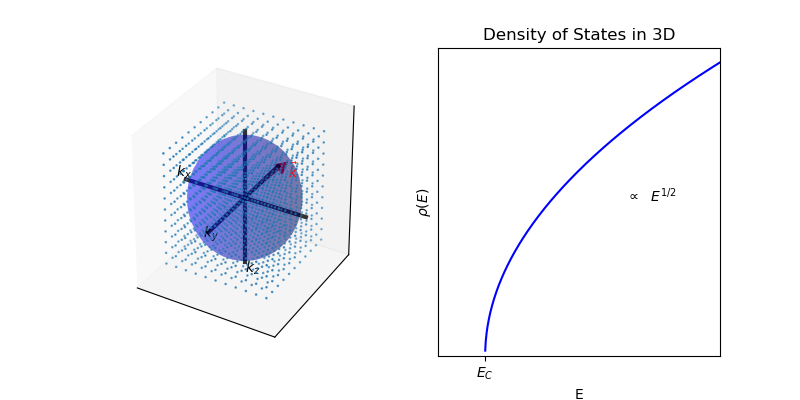

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import MSE430Funcs.DOSFuncs as dosf

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


#Input the desired dimension, then run the cell:
#Ex: dim = 3 will plot in 3D
# Only input 1-3
# *** ================================= ***
dim = 3
# *** ================================= ***


#Construct plotting space:
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(121, projection="3d")
ax2 = fig1.add_subplot(122)


#Based on the dimension chosen this function returns:
    #kx, ky, kz: Grid of k-space coordinates spanning all of k-space in given dimension
    #k_vec_x/y/z: Coordinates of k vector projected in kx, ky and kz direction
    #x/y/z: surface coordinates encapsulating the kspace defined by the k vector
(kx, ky, kz, k_vec_x, k_vec_y, k_vec_z, kx_t, ky_t, kz_t, x, y, z) = dosf.k_diag(dim)

#Scatter plot of all kx, ky, kz points (creates grid)
ax1.scatter(kx, ky, kz, s=0.7)

#Surface plot encapsulating all k-points that lie within k-vector of origin
surf = ax1.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.3)

#k-vector represented by arrow stretching from origin to surface of allowed k-space
    #No easy way to do this in 3D
class Arrow3D(FancyArrowPatch):
    from matplotlib.patches import FancyArrowPatch
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
a = Arrow3D(k_vec_x, k_vec_y, k_vec_z, mutation_scale=20,
             lw=1, arrowstyle="-|>", color="r")
ax1.add_artist(a)

#Plot label for k-vector
tx = ax1.text(kx_t, ky_t, kz_t, r'$\vec{k}$', color='r')
dosf.center_axis(ax1)

#DOS vs. E plot

#DOS function returns the relationship for given dimension
gE, Es = dosf.DOS(dim)
ax2.plot(Es, gE, 'blue')

dosf.graphProp(ax1, ax2, dim)

plt.show()

